In [1]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
DATASET_COLUMNS = ['target', 'ids', 'date', 'flag', 'user', 'text']
df = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1', names=DATASET_COLUMNS)
df

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [3]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
df.shape

(1600000, 6)

In [6]:
df.describe()

,target,ids
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [7]:
df = df.drop(['ids', 'date', 'flag', 'user'], axis=1)

In [8]:
# Replacing the values to ease understanding.
df['target'] = df['target'].replace(4,1)

<AxesSubplot:xlabel='target', ylabel='count'>

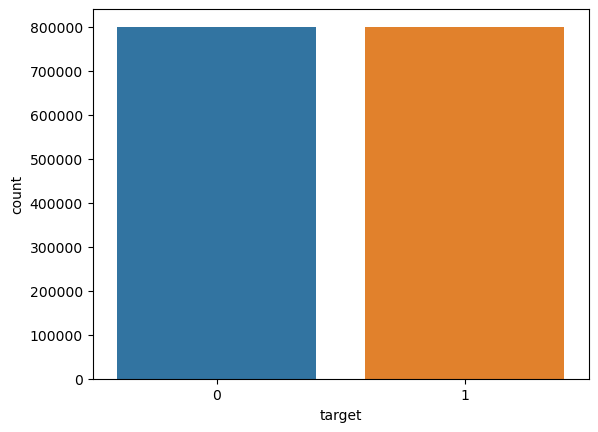

In [9]:
import seaborn as sns
sns.countplot(data=df, x='target')

In [10]:
stop_words = stopwords.words('english')
stop_words.remove('not')

In [11]:
import re
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations


def cleaning_text(x):
    temp =" ".join([w for w in str(x).split() if w not in stop_words])
    translator =  str.maketrans("", "", punctuations_list)
    temp =  str(temp).translate(translator)
    temp = re.sub('((www.[^s]+)|(https?://[^s]+))',' ',temp)   #to remove URLs
    temp = re.sub('[0-9]+', '', temp) 
    #  remove special characters
    temp = re.sub(r"[^a-zA-Z0-9]+", ' ', temp)   #Removing Non-Alphanumeric Characters
    return temp.lower()


df['text'] = df['text'].apply(cleaning_text)

In [12]:
df.head()

,target,text
0,0,switchfoot httptwitpiccomyzl a s bummer you sh...
1,0,upset cant update facebook texting it might cr...
2,0,kenichan i dived many times ball managed save ...
3,0,whole body feels itchy like fire
4,0,nationwideclass no not behaving all im mad her...


In [13]:
df

,target,text
0,0,switchfoot httptwitpiccomyzl a s bummer you sh...
1,0,upset cant update facebook texting it might cr...
2,0,kenichan i dived many times ball managed save ...
3,0,whole body feels itchy like fire
4,0,nationwideclass no not behaving all im mad her...
...,...,...
1599995,1,just woke up having school best feeling ever
1599996,1,thewdbcom very cool hear old walt interviews h...
1599997,1,are ready mojo makeover ask details
1599998,1,happy th birthday boo alll time tupac amaru sh...


In [14]:
# count vectorizer

from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_features=1200)
vectorized_data = count_vectorizer.fit_transform(df['text'])

y= df['target']

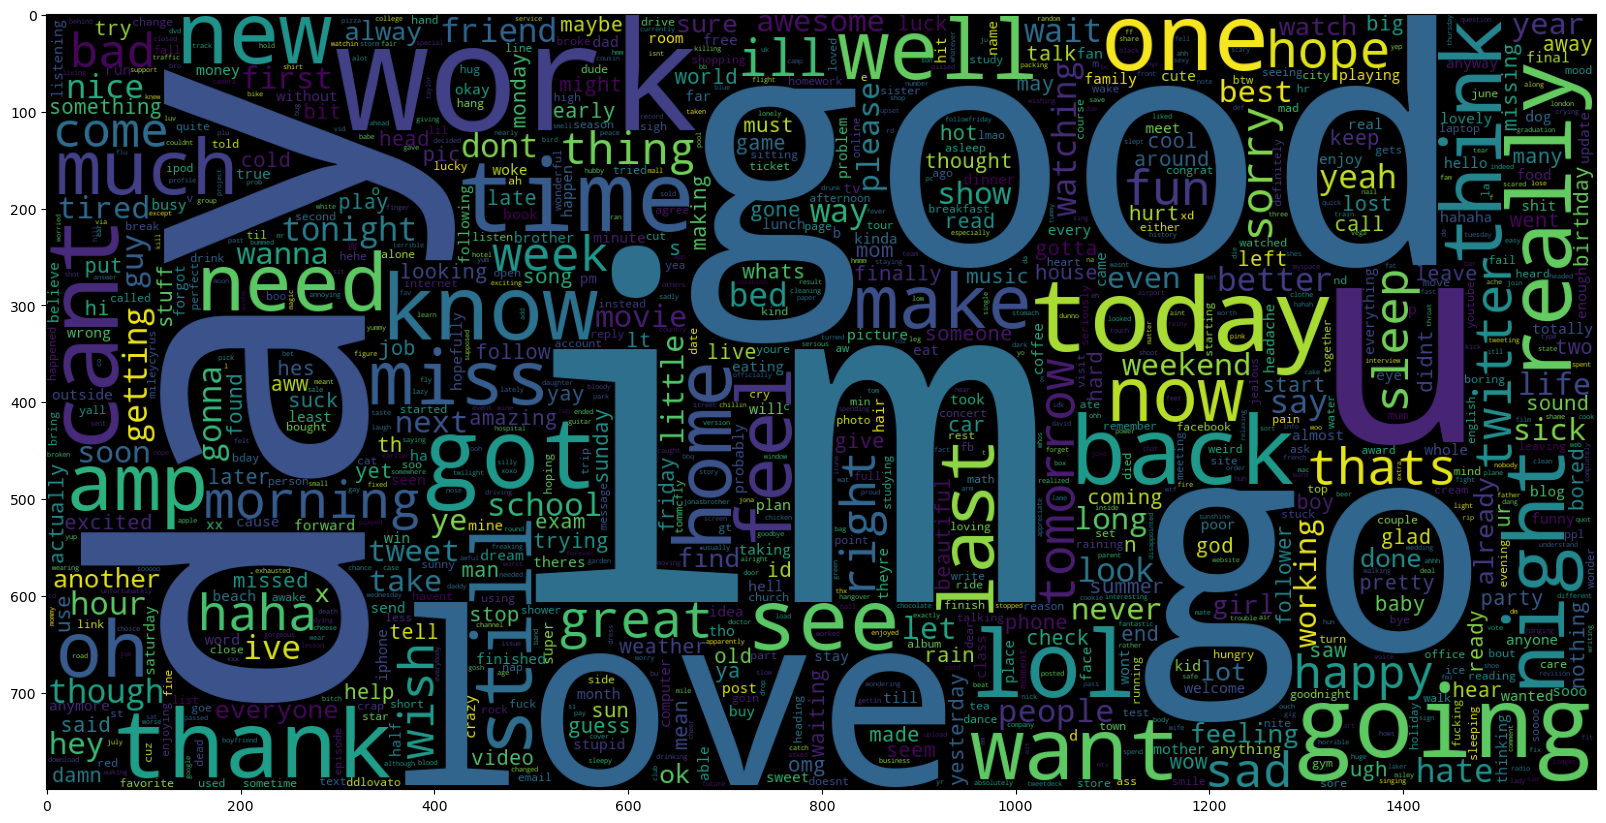

In [15]:
from wordcloud import WordCloud
data_neg = df['text']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

In [16]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [17]:
X=df['text']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =42)

In [18]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [19]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [20]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.80      0.77      0.79    159494
           1       0.78      0.81      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000

Accuracy: 0.789871875


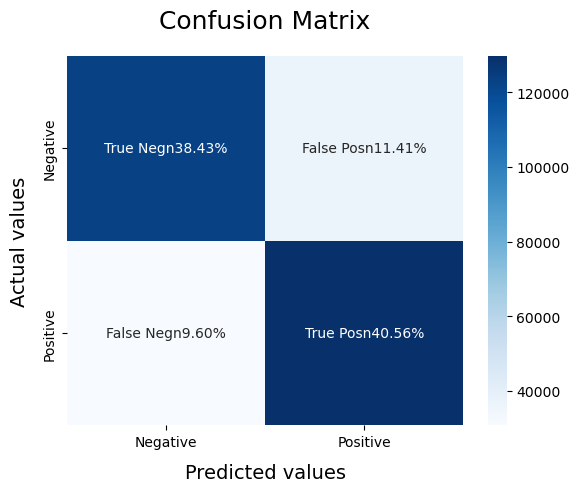

In [21]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79    159494
           1       0.79      0.80      0.80    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000

Accuracy: 0.792390625


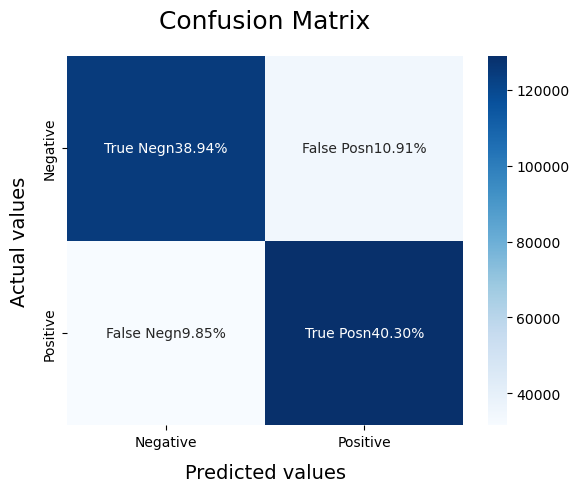

In [22]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80    159494
           1       0.79      0.82      0.81    160506

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000

Accuracy: 0.80348125


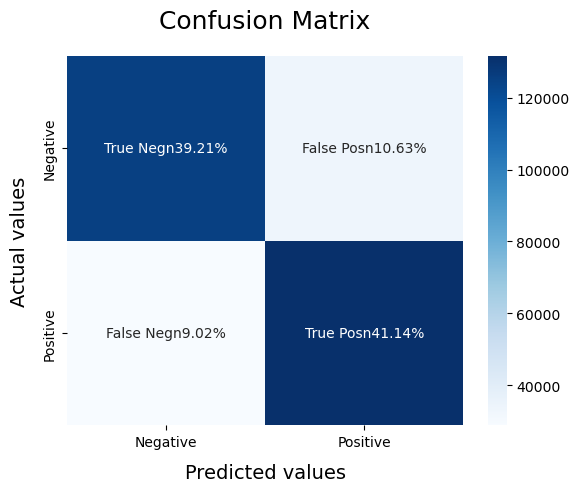

In [23]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

In [24]:
def predict_emotion_custom_input(text, vectorizer, models):
    # Preprocess the input text
    processed_text = cleaning_text(text)
    
    # Transform the preprocessed text using the vectorizer
    text_vectorized = vectorizer.transform([processed_text])
    
    # Predict emotion using each model
    predictions = {}
    for model_name, model in models.items():
        prediction = model.predict(text_vectorized)
        predictions[model_name] = prediction[0]
    
    return predictions


input_text = "Today Dad gifted me watch"
emotion_predictions_custom = predict_emotion_custom_input(input_text, vectoriser, {"BernoulliNB": BNBmodel, "LinearSVC": SVCmodel, "LogisticRegression": LRmodel})
print("Emotion Predictions (Custom Input):")
for model_name, prediction in emotion_predictions_custom.items():
    print(f"{model_name}: {'Positive' if prediction == 1 else 'Negative'}")


Emotion Predictions (Custom Input):
BernoulliNB: Positive
LinearSVC: Positive
LogisticRegression: Positive


In [25]:
# Function to predict sentiment and calculate accuracy
def predict_sentiment(input_text):
    # Preprocess input text
    cleaned_text = cleaning_text(input_text)
    # Transform preprocessed text using vectorizer
    input_vector = vectoriser.transform([cleaned_text])
    # Predict sentiment using each model
    BNB_prediction = BNBmodel.predict(input_vector)
    SVC_prediction = SVCmodel.predict(input_vector)
    LR_prediction = LRmodel.predict(input_vector)
    # Return predictions
    return {
        'BernoulliNB': int(BNB_prediction[0]),
        'LinearSVC': int(SVC_prediction[0]),
        'LogisticRegression': int(LR_prediction[0])
    }

# Sample input text
input_text = "This is a great movie! I loved it."

# Predict sentiment and calculate accuracy
predictions = predict_sentiment(input_text)
print("Predictions:", predictions)

Predictions: {'BernoulliNB': 1, 'LinearSVC': 1, 'LogisticRegression': 1}
